In [14]:
import tensorflow as tf

In [15]:
mnist = tf.keras.datasets.mnist

In [16]:
(x_train,y_train),(x_test,y_test) =mnist.load_data()

In [17]:
x_train.shape

(60000, 28, 28)

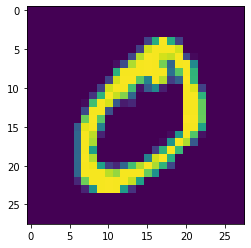

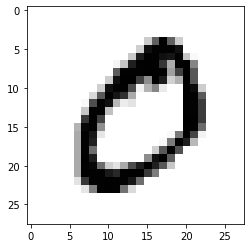

In [18]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])
plt.show()
plt.imshow(x_train[1], cmap=plt.cm.binary)

In [19]:
print(y_train[1])

0


In [20]:
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

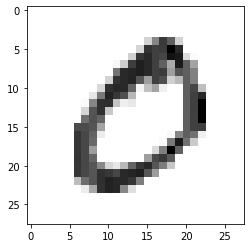

In [21]:
x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[1],cmap=plt.cm.binary)

In [22]:
print(y_train[0])

5


In [23]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [25]:
model=Sequential()
model.add(Conv2D(64,(3,3), input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [27]:
print("Total Training Samples=" ,len(x_trainr))

Total Training Samples= 60000


In [28]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [29]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 28s 20ms/step - loss: 0.3406 - accuracy: 0.8918 - val_loss: 0.1377 - val_accuracy: 0.9586
Epoch 2/5
1313/1313 [==============================] - 27s 21ms/step - loss: 0.1124 - accuracy: 0.9669 - val_loss: 0.1127 - val_accuracy: 0.9654
Epoch 3/5
1313/1313 [==============================] - 27s 21ms/step - loss: 0.0779 - accuracy: 0.9765 - val_loss: 0.0703 - val_accuracy: 0.9792
Epoch 4/5
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0616 - accuracy: 0.9817 - val_loss: 0.0654 - val_accuracy: 0.9808
Epoch 5/5
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0497 - accuracy: 0.9845 - val_loss: 0.0679 - val_accuracy: 0.9803


In [30]:
test_loss,test_acc=model.evaluate(x_testr,y_test)
print("Test loss on 10,000 test samples",test_loss)
print("Validation Accuracy on 10,000 test samples",test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0660 - accuracy: 0.9820
Test loss on 10,000 test samples 0.06602300703525543
Validation Accuracy on 10,000 test samples 0.9819999933242798


In [31]:
predictions=model.predict(x_testr)

313/313 [==============================] - 2s 6ms/step


In [32]:
print(predictions)

[[6.2764907e-06 9.7930126e-07 2.3162368e-06 ... 9.9998581e-01
  6.7727095e-09 3.6734600e-06]
 [2.0423669e-03 7.1169743e-05 9.9176568e-01 ... 2.2612448e-05
  5.7560536e-03 1.3017821e-05]
 [2.0605687e-06 9.9999595e-01 2.0032805e-07 ... 5.6641113e-07
  5.4706820e-08 1.3356771e-07]
 ...
 [4.4222386e-07 1.9568437e-05 1.3691469e-08 ... 1.3535723e-05
  2.4083399e-06 3.9320262e-06]
 [2.3506403e-04 3.6437193e-06 6.0123439e-06 ... 1.5846330e-08
  5.4056087e-04 3.7873945e-06]
 [4.8210230e-04 4.9465717e-07 1.3973520e-04 ... 4.8245022e-07
  3.6490226e-05 5.9111323e-07]]


In [26]:
print(np.argmax(predictions[0]))

7


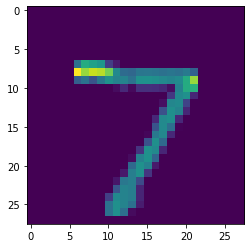

In [27]:
plt.imshow(x_test[0])

In [2]:
import cv2


In [7]:
img=cv2.imread('6.jpg')

In [8]:
img.shape

(769, 558, 3)

In [9]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [10]:
gray.shape

(769, 558)

In [11]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [12]:
resized.shape

(28, 28)

In [13]:
newing=tf.keras.utils.normalize(resized,axis=1)

NameError: name 'tf' is not defined

In [88]:
newing=np.array(newing).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [89]:
newing.shape


(1, 28, 28, 1)

In [90]:
predictions=model.predict(newing)

1/1 [==============================] - 0s 19ms/step


In [91]:
print(np.argmax(predictions))

2
